In [45]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [46]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/'  #change dir to your project folder

Mounted at /content/gdrive


In [0]:
path = 'gdrive/My Drive/data'

In [0]:
import os
path = '/content/gdrive/My Drive/data/testing set/crop'


In [0]:
path1 = os.listdir(path)

In [0]:
path1

['505.tif',
 '511.tif',
 '507.tif',
 '512.tif',
 '513.tif',
 '514.tif',
 '509.tif',
 '510.tif',
 '506.tif',
 '508.tif',
 '515.tif',
 '517.tif',
 '518.tif',
 '523.tif',
 '519.tif',
 '521.tif',
 '516.tif',
 '524.tif',
 '520.tif',
 '522.tif',
 '525.tif',
 '528.tif',
 '526.tif',
 '533.tif',
 '527.tif',
 '529.tif',
 '534.tif',
 '530.tif',
 '531.tif',
 '532.tif',
 '535.tif',
 '542.tif',
 '543.tif',
 '537.tif',
 '541.tif',
 '538.tif',
 '536.tif',
 '540.tif',
 '544.tif',
 '539.tif',
 '545.tif',
 '546.tif',
 '547.tif',
 '550.tif',
 '549.tif',
 '552.tif',
 '551.tif',
 '554.tif',
 '553.tif',
 '548.tif',
 '555.tif',
 '557.tif',
 '556.tif',
 '564.tif',
 '563.tif',
 '558.tif',
 '561.tif',
 '560.tif',
 '559.tif',
 '562.tif',
 '568.tif',
 '567.tif',
 '573.tif',
 '569.tif',
 '572.tif',
 '570.tif',
 '571.tif',
 '574.tif',
 '565.tif',
 '566.tif',
 '580.tif',
 '577.tif',
 '581.tif',
 '575.tif',
 '582.tif',
 '584.tif',
 '576.tif',
 '583.tif',
 '579.tif',
 '578.tif',
 '585.tif',
 '587.tif',
 '588.tif',
 '58

In [61]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix


# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))





# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.summary()
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/data/training set',target_size = (64, 64),batch_size = 32,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/data/testing set',target_size = (64, 64), batch_size = 32,class_mode = 'binary')
#val_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/data/validation set',target_size = (64, 64), batch_size = 32,class_mode = 'binary')


classifier.fit_generator(training_set,steps_per_epoch = 1258//32,epochs = 5,validation_data = test_set,validation_steps = 312//32)
val_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/data/validation set',target_size = (64, 64), batch_size = 32,class_mode = 'binary')

(loss, acc)= classifier.evaluate_generator(val_set, verbose=1)


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_16 (Dense)             (None, 1)               

In [62]:
print('accuracy of model:',acc)

accuracy of model: 0.8375796163158052


In [63]:
print('loss of model:',loss)

loss of model: 0.3836366936659357


In [0]:

# Part 3 - Making new prediions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/gdrive/My Drive/data/testing set/crop/545.tif', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'weed'
else:
    prediction = 'crop'
    

In [65]:
print(prediction)

crop


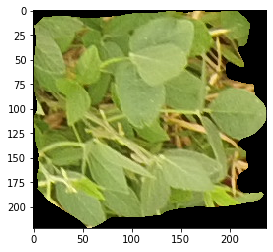

In [66]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('/content/gdrive/My Drive/data/testing set/crop/545.tif')) 